# As características que determinam o sucesso dos videogames: uma análise de dados

A loja de videogames Ice deseja saber quais são so fatores que determinam o sucesso dos jogos. Para isso, nos foram fornecidas várias informações sobre diversos jogos, como gênero, plataforma de lançamento, avaliação de especialistas e do público, além dos dados históricos de vendas. Através da nossa análise, buscamos determinar os elementos que foram mais determinantes para o sucesso comercial dos jogos.

## Carregandos os dados

Antes de começar a trabalhar com os dados, vamos importar algumas bibliotecas que serão úteis para nossa análise:

In [1]:
# Biblioteca para carregar e manipular tabelas (DataFrames)
import pandas as pd

# Biblioteca para geração de gráficos e diagramas
import matplotlib.pyplot as plt

# Biblioteca para cálculos estatísticos
from scipy import stats as st

# Bibliotecas para cálculos matemáticos avançados
import numpy as np
import math

Agora vamos carregar nossos dados em um tabela (DataFrame):

In [2]:
game_data = pd.read_csv('C:/Users/atlas/documents/projetos_dados/datasets/games.csv')

# Imprimindo as primeiras 5 linhas
game_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Vamos ver as informações gerais da tabela:

In [3]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Por essas informações, podemos ver alguns procedimentos que precisam ser executados antes da análise: é preciso decidir o que fazer com os valores ausentes nas colunas ``Name``, ``Year_of_Release``, ``Genre``, ``Critic_Score``, ``User_Score`` e ``Rating``. Como há letras maiúsculas entre os nomes das colunas, será necessário mudá-los para apenas letras minúsculas, porque isso facilita o trabalho com os dados e evita erros. Esse procedimento também precisa ser feito para os dados nas colunas ``Name``, ``Pratform`` e ``Genre``.

## Pré-processamento

Vamos começar procurando por linhas duplicadas na tabela:

In [4]:
game_data.duplicated().sum()

0

Ótimo, não temos linhas duplicadas. Agora podemos seguir para as alterações nos dados.

### Alterando os nomes das colunas

Para simplificar os códigos, vamos substituir os nomes das colunas por suas versões em minúsculas:

In [5]:
game_data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release',
                  'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                  'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'}, 
                 inplace=True)

# Vamos ver como ficaram as informações novamente
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Agora todas as colunas estão em minúsculas. Isso vai facilitar o nosso trabalho.

### A coluna ``name``

Vamos começar convertendo os nomes dos jogos para minúsculas, pelo mesmo motivo que convertemos os nomes das colunas:

In [6]:
game_data['name'] = game_data['name'].str.lower()

# Vendo os valores resultante
game_data['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

Agora vamos conferir as linhas com valores ausentes:

In [7]:
game_data[game_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Como sem o nome não é possível identificar o jogo, excluir essas linhas não vai causar impacto na análise:

In [8]:
game_data.dropna(subset=['name'], inplace=True)

# Conferindo as informações
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


As duas linhas forma excluídas.

### A coluna ``platform``

Vamos alterar os nomes das plataformas para que todas estejam em letras minúsculas, assim como fizemos com os nomes dos consoles:

In [9]:
game_data['platform'] = game_data['platform'].str.lower()

# Vamos ver os valores da coluna
game_data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Tudo certo por aqui, vamos seguir adiante.

### A coluna ``year_of_release``

Há alguns valores ausentes na coluna com o ano de lançamento. Vamos observar as características da coluna para decidir que valor utilizar para preencher essas linhas:

In [10]:
game_data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Os valores da média e da mediana são bem próximos, porém vemos que há uma boa distância entre o valor mínimo e o máximo, logo ficamos mais tentados a utilizar a mediana. Por outro lado, o ano de lançamento é impactado pela plataforma, uma vez que cada uma tem um período de atividade, entre o lançamento e o encerramento da produção. Logo, vamos criar uma função para substituir os valores ausentes com a mediana da plataforma em questão. Primeiro vamos agrupar a tabela pela mediana de cada plataforma e depois utilizá-la em nossa função.

In [11]:
# Criando a tabela dinâmica com a mediana do ano de lançamento por plataforma
release_table = game_data.groupby('platform')['year_of_release'].median()

# Criando a função para preencher as linhas ausentes
def release_filler(row):
    if pd.isna(row['year_of_release']):
        return release_table[row['platform']]
    else:
        return row['year_of_release']
    
# Testando a função
release_filler(game_data.loc[1])

1985.0

Aplicando a função a coluna ``year_of_release``:

In [12]:
game_data['year_of_release'] = game_data.apply(release_filler, axis=1)

# Conferindo as informações
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 2.0+ MB


Como o formato está como decimal (*float64*), vamos converter a coluna para inteiros, por convenção:

In [13]:
game_data['year_of_release'] = game_data['year_of_release'].astype('int')

# Vamos ver como ficaram as primeiras linhas da tabela
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Tudo certo por aqui.

### A coluna ``genre``

A coluna com os gêneros dos jogos não possui valores ausentes. Vamos ver os valores únicos:

In [14]:
game_data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Vamos converter os nomes para letras mínusculas:

In [15]:
game_data['genre'] = game_data['genre'].str.lower()

# Vendo as primeiras linhas da tabela
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### A coluna ``critic_score``

Vamos ver os valores únicos da coluna com a pontuação da crítica:

In [16]:
game_data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Vamos começar tratando dos valores ausentes. Para isso, precisamos observar as características da coluna:

In [17]:
game_data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

A média e a mediana são valores próximos, mas vamos ver também como esses valores variam por gênero:

In [18]:
game_data.pivot_table(index='genre', values='critic_score', aggfunc=['median', 'mean'])

,median,mean
,critic_score,critic_score
genre,,
action,68.0,66.629101
adventure,66.0,65.331269
fighting,72.0,69.217604
misc,69.0,66.619503
platform,69.0,68.058350
puzzle,70.0,67.424107
racing,69.0,67.963612
role-playing,74.0,72.652646


Como a variação é pequena, optamos por substituir os valores ausentes pela mediana total ao invés de condicionar a mediana de cada gênero:

In [19]:
game_data['critic_score'] = game_data['critic_score'].fillna(game_data['critic_score'].mean())

# Conferindo se restam linhas em branco
game_data['critic_score'].isna().sum()

0

Vamos agora converter os valores para inteiros, uma vez que não há decimais nos dados:

In [20]:
game_data['critic_score'] = game_data['critic_score'].astype('int')

# Imprimindo as informações da tabela mais uma vez
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.9+ MB


### A coluna ``user_score``

A coluna com a avaliação dos usuários está em formato de texto (object), vejamos porquê:

In [21]:
game_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Vemos que há um 'tbd' entre os valores. Isso significa "to be defined" ("a ser definido"), ele é usado para jogos que não tinham pontuação definida no momento em que os dados foram gerados. Vamos substituir o seu valor por NA:

In [22]:
game_data['user_score'] = game_data['user_score'].replace({'tbd': np.nan})

# Vendo quanto temos de cada valor
game_data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.7      2
1.1      2
2.3      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

Vamos converter os dados para decimais e conferir alguns dados da coluna antes de decidir como substituí-los:

In [23]:
game_data['user_score'] = game_data['user_score'].astype('float')

game_data['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Como o desvio padrão não é muito alto, vamos substituir os valores pela média:

In [24]:
game_data['user_score'] = game_data['user_score'].fillna(game_data['user_score'].mean())

# Vendo as informações
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.9+ MB


### A coluna ``rating``

Existem valores ausentes na coluna ``rating``. Vamos ver quais são os valores dessa coluna:

In [25]:
game_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

A coluna contém a classificação indicativa dos jogos, portando é uma variável categórica. Dessa forma, não podemos susbstituir os valores pela média ou pela mediana. Porém, como a classificação está bastante relacionada ao gênero do jogo, nós precisamos encontrar os valores mais comuns para cada gênero e utilizá-lo para preencher as linhas ausentes. Vamos agrupar os dados por gênero e utilizar a moda para encontrar a classificação mais comum de cada um.

In [26]:
rating_table = game_data.groupby('genre')['rating'].agg(pd.Series.mode)

# Criando a função
def rating_filler(row):
    if pd.isna(row['rating']):
        return rating_table[row['genre']]
    else:
        return row['rating']
    
# Testando a função
rating_filler(game_data.loc[0])

'E'

Aplicando à coluna ``rating``:

In [27]:
game_data['rating'] = game_data.apply(rating_filler, axis=1)

# Vendo as informações da tabela
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.9+ MB


Os formatos foram corrigidos e os valores ausentes foram todos preenchidos.

### Calculando o total de vendas

Para calcular o total de vendas de cada jogo, precisamos somar as vendas na América do Norte (coluna ``na_sales``), na Europa (``eu_sales``), no Japão (``jp_sales``) e em outras regiões (``other_sales``). Vamos fazer isso e armazenar o valor na coluna ``total_sales``:

In [28]:
game_data['total_sales'] = game_data['na_sales'] + game_data['eu_sales'] + game_data['jp_sales'] + game_data['other_sales']

# Observando as primeiras linhas da tabela
game_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.000000,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,68,7.125046,E,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.300000,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.000000,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,68,7.125046,T,31.38


Uma última olhada de como ficou nosso DataFrame:

In [29]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 2.0+ MB


**Conclusão parcial**

Na etapa de pré-processamento, nós convertemos alguns formatos de dados e transformamos letras maiúsculas em minúsculas nos nomes das colunas e nas variáveis categóricas. Também tratamos dos valores ausentes, decidindo caso a caso qual o melhor método para preenchê-los. Por fim, somamos as vendas em cada região para criar uma coluna com os dados do total de vendas de cada jogo.

## Analisando os dados

Nesta seção, vamos analisar os anos de lançamento dos jogos, como as vendas variam de acordo com a plataforma, quanto as avaliações da crítica e dos usuários impactam as vendas e como os gêneros afetam o desempenho comercial dos jogos.

### Lançamento de jogos por ano

Vamos observar quantos jogos foram lançados em cada ano:

In [30]:
game_data['year_of_release'].value_counts()

2009    1476
2008    1457
2010    1302
2007    1197
2011    1161
2006    1006
2005     973
2002     829
2003     800
2004     783
2012     653
2015     606
2014     582
2013     552
2016     502
2001     482
1998     386
2000     350
1999     341
1997     290
1996     263
1995     219
1994     121
1993      60
1982      53
1981      46
1992      43
1991      41
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Vemos que poucos jogos foram lançados na década de 1980 e que o volume passa a crescer a partir do meio da década de 1990. Visualizar esses dados também pode nos dar uma boa noção da frequência de lançamentos:

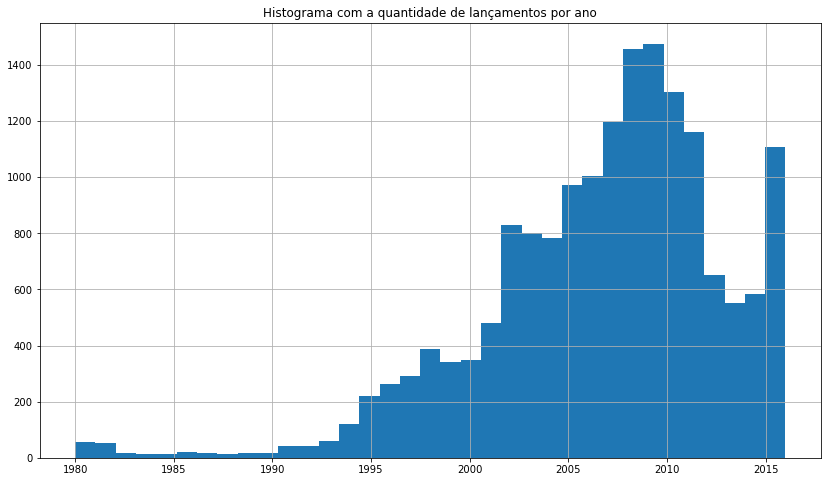

In [31]:
# Criando um histograma por ano de lançamento com 35 colunas
game_data['year_of_release'].hist(bins=35, figsize=(14,8))

# Nomeando o gráfico
plt.title('Histograma com a quantidade de lançamentos por ano')

# Exibindo o gráfico
plt.show()

Fica claro que o ritmo de lançamento de jogos se intensifica a partir de 1995, com um salto significativo depois do ano 2000. Os picos de lançamento são entre 2007 e 2012. Mas como podemos observar, há um longo período, entre 1980 e 1995, com comparativamente poucos lançamentos, o que indica que pode ser interessante excluir os jogos lançados entre essas datas da nossa análise.

### Lançamentos e vendas por plataforma

Vamos analisar agora como os jogos se distribuem por plataforma:

In [32]:
game_data['platform'].value_counts().head(10)

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
Name: platform, dtype: int64

Vemos que em popularidade de lançamentos, PS2, DS, PS3, Wii, Xbox360 e PSP lideram. Vamos ver se essa ordem se mantém quando agrupamos os dados pelo total de vendas:

In [33]:
game_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
ps       730.86
gba      317.85
ps4      314.14
psp      294.05
pc       259.52
Name: total_sales, dtype: float64

Agora o PS2 aparece com uma vantagem bem definida em relação as outras plataformas e, apesar dos outros terem apenas trocados de posições, o PSP não está mais entre os 6 primeiros, perdendo seu lugar para o PS. Vamos visualizar agora como as vendas variam por ano para cada plataforma:

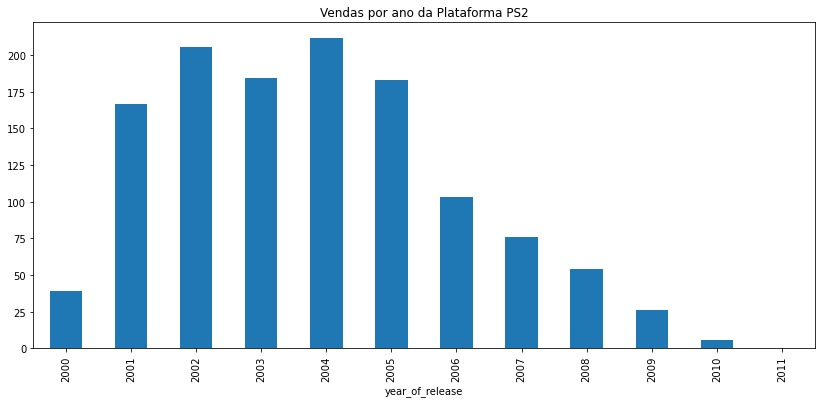

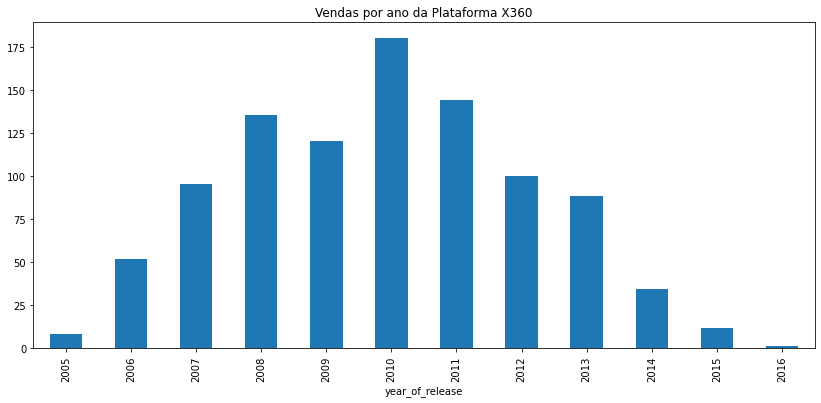

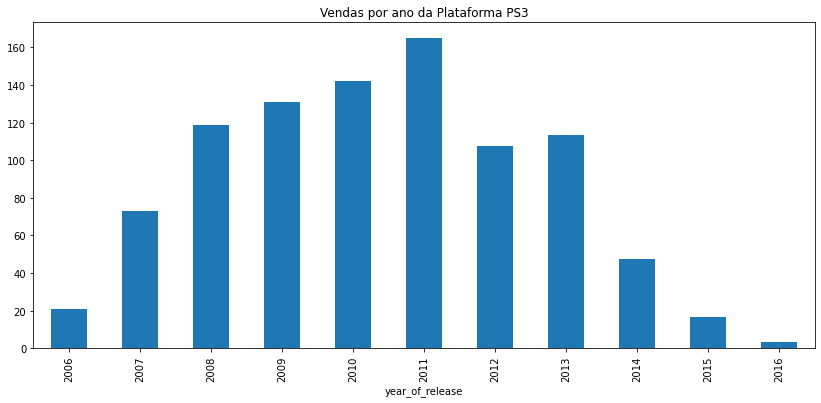

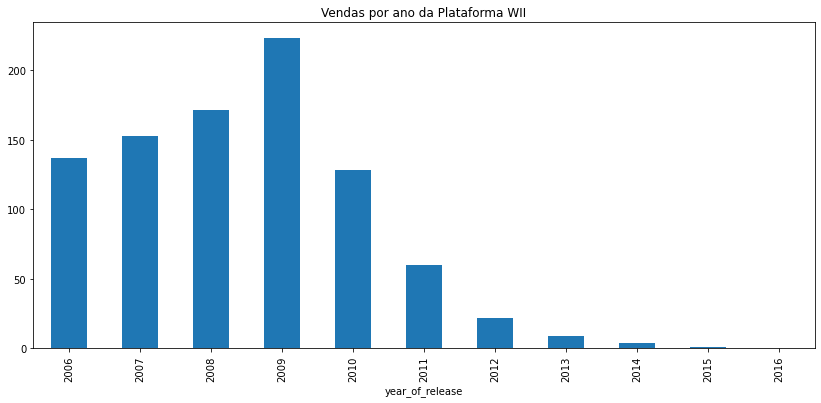

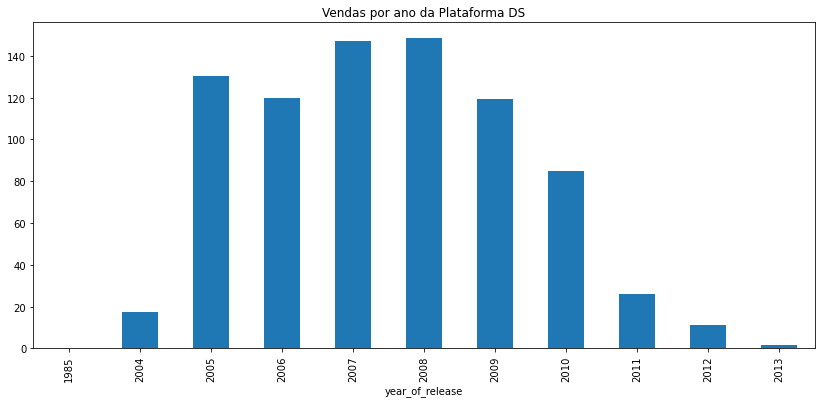

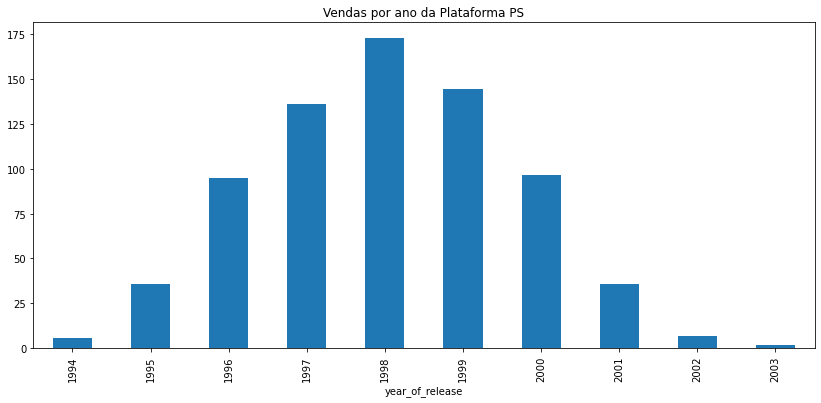

In [34]:
# Primeiro, vamos criar separar as 6 plataformas com maior soma de vendas em uma tabela
biggest_six = game_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)

# Agora vamos utilizar um loop "for" para criar gráficos de barras para as vendas de cada plaforma
for platform in biggest_six.index:
    data = game_data.query('platform == @platform')
    data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(14,6))
    plt.title(f"Vendas por ano da Plataforma {platform.upper()}")
    plt.show()

Vemos que a maioria das plataformas tem um período de atividade de 10 ou 11 anos. PS2, que começou suas vendas em 2000, teve um desempenho ótimo de 2001 a 2005, e começou um declínio em 2006, culminando no fim das vendas em 2011. O Xbox360, PS3 e o PS têm desempenhos similares, com 5 anos de ascensão nas vendas, seguidos por um périodo de 4 a 6 anos de declínio até sua extinção. O Nintendo Wii teve 4 anos de ascenção, a partir de 2006, seu ano de lançamento, seguido de forte queda após 2010, com vendas pouco expressivas entre 2013 e 2016. Já o DS, depois de um primeiro ano com poucas vendas, teve um grande salto nas vendas no ano seguinte, 2005, mantendo um bom desempenho até 2010, quando iniciou um rápido declínio nas vendas. Comparando a performance do PS2 com seu sucesso, o PS3, vemos que demorou um périodo de cerca de 5 anos (de 2006 a 2011) para que uma plataforma fosse substituída pela outra.

### Fatiando os dados úteis

Como vimos nas análises anteriores, o período que parece mais interessante para nosso estudo é o que se inicia em 2000 e vai até 2016. Com excessão do PS, todas as outras 5 grandes plataformas tiveram seus ciclos de vida nesse período. Portanto, vamos criar uma fatia da nossa tabela apenas com os dados posteriores a 2000:

In [35]:
game_filt = game_data.loc[(game_data['year_of_release']>1999)]

# Observando as plataformas que restaram
game_filt['platform'].value_counts()

ps2     2161
ds      2150
ps3     1331
wii     1320
x360    1262
psp     1209
pc       934
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
ps       274
xone     247
wiiu     147
n64       70
dc        31
gb        27
ws         4
Name: platform, dtype: int64

Pelo visto, nos anos 2000, o PS2 é o console com maior número de jogos lançados. Vamos se isso se mantém ao calcularmos o total de vendas:

In [36]:
game_filt_sales = game_filt.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
game_filt_sales

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.10
gba      317.85
ps4      314.14
psp      294.05
3ds      259.00
xb       257.74
pc       209.48
gc       198.93
xone     159.32
ps       140.70
wiiu      82.19
psv       54.07
n64       37.30
gb        29.00
dc         7.41
ws         0.96
Name: total_sales, dtype: float64

Há trocas de lugares, mas parece haver uma relação entre o somatória das vendas da plataforma e a quantidade de jogos lançados no périodo. O PS2 continua liderando, agora seguido pelo Xbox360 e o PS3. Vamos criar alguns gráficos de barras para observar como as vendas de cada plataforma é distribuída por ano, mas antes vamos separar apenas as 15 plataformas mais lucrativas:

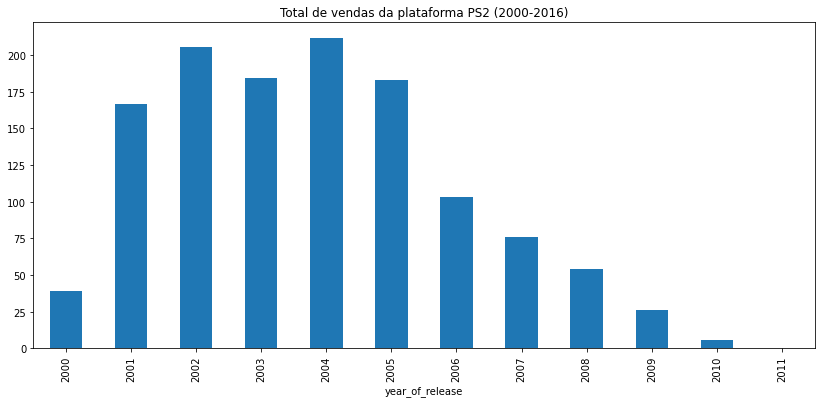

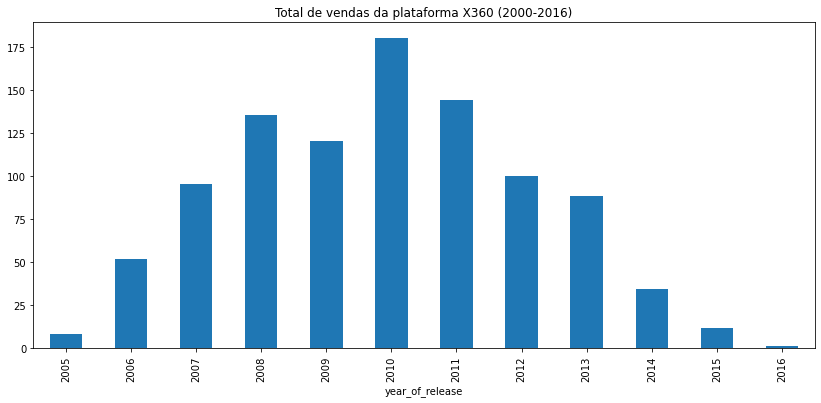

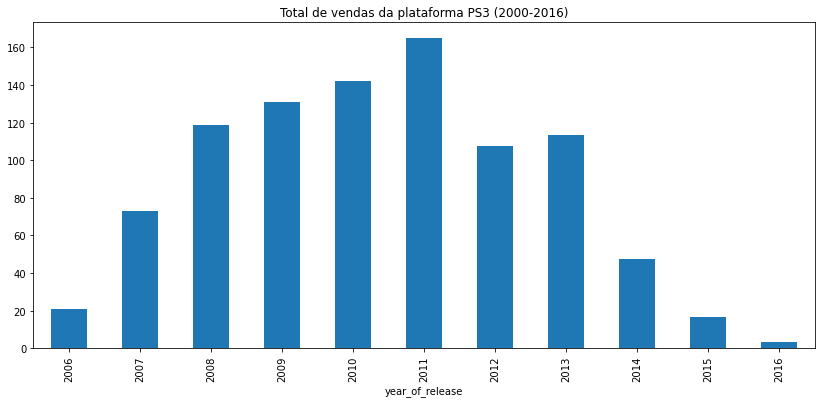

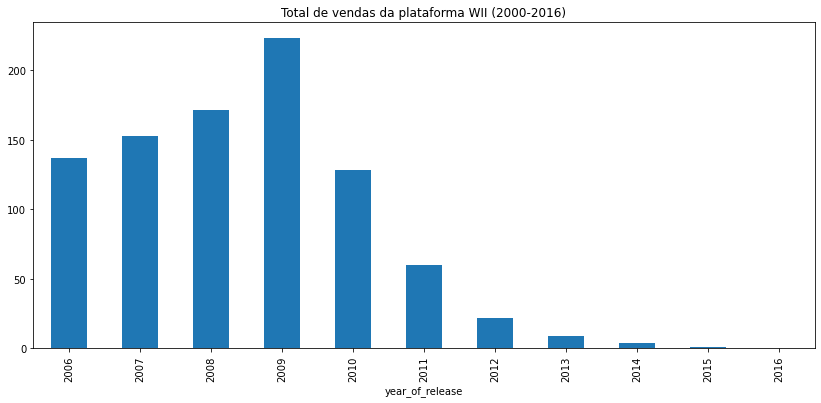

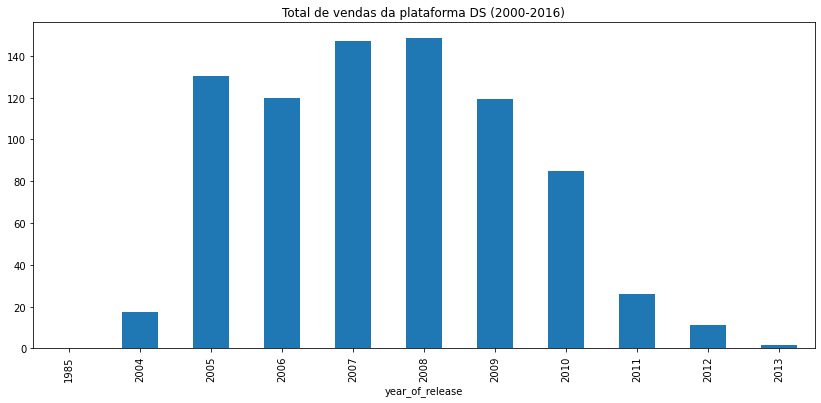

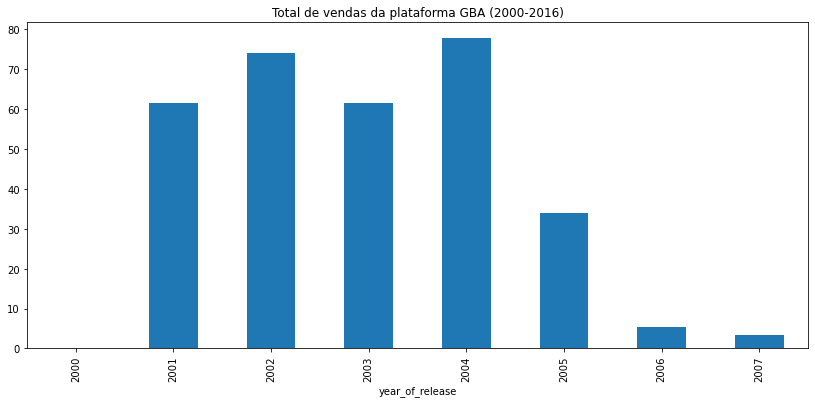

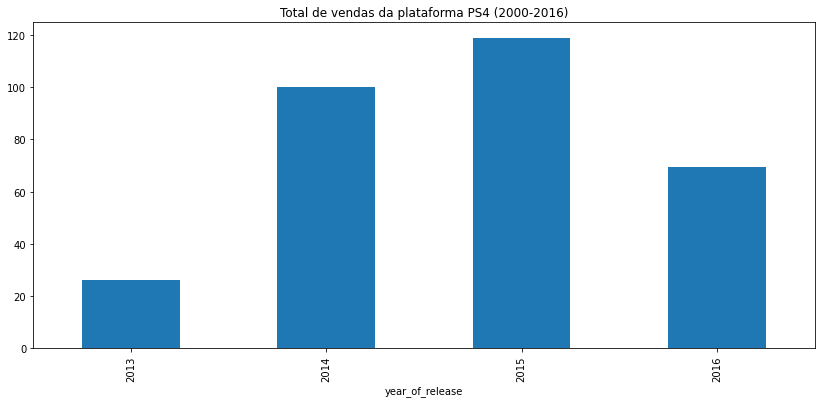

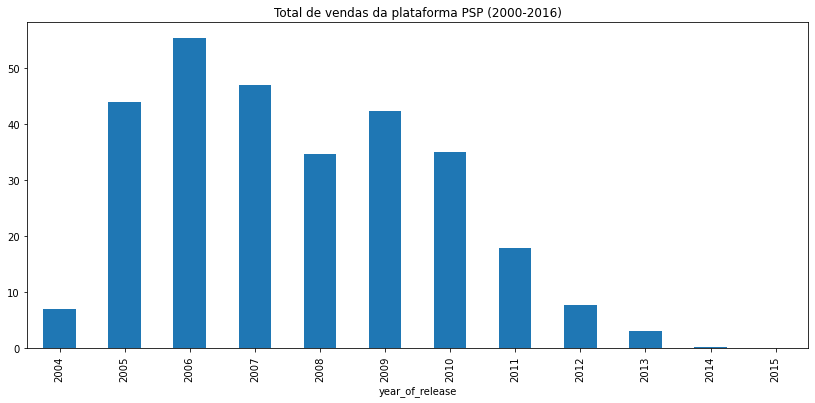

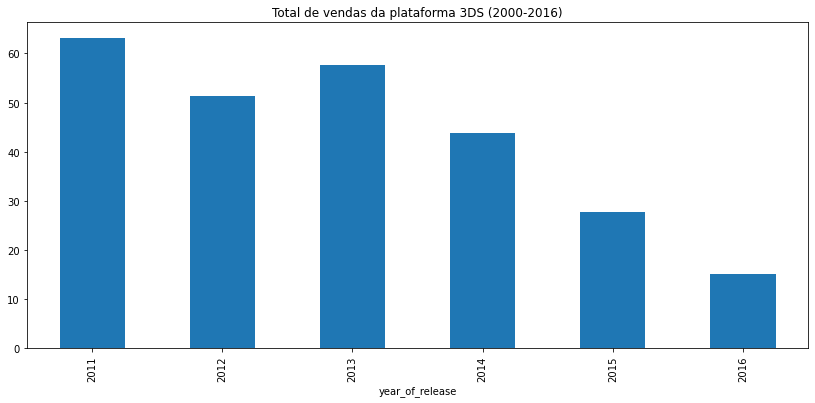

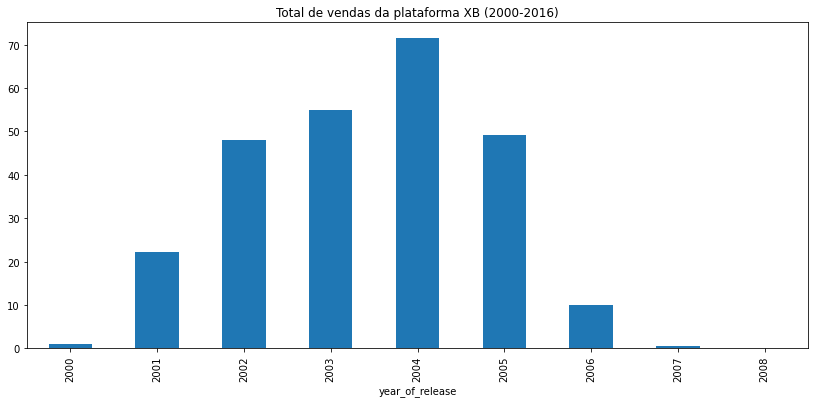

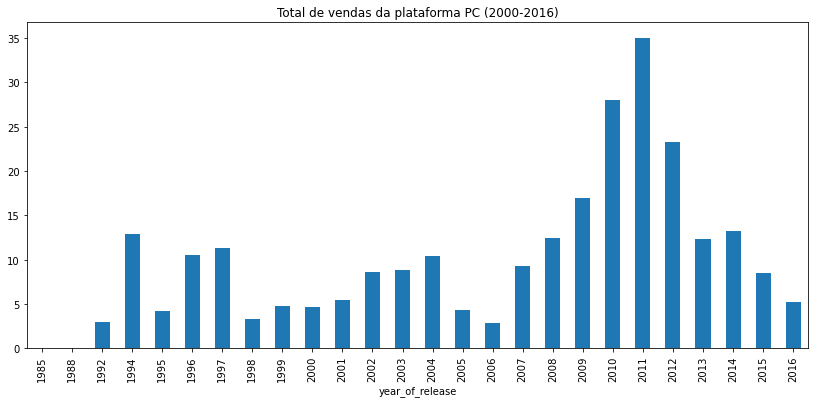

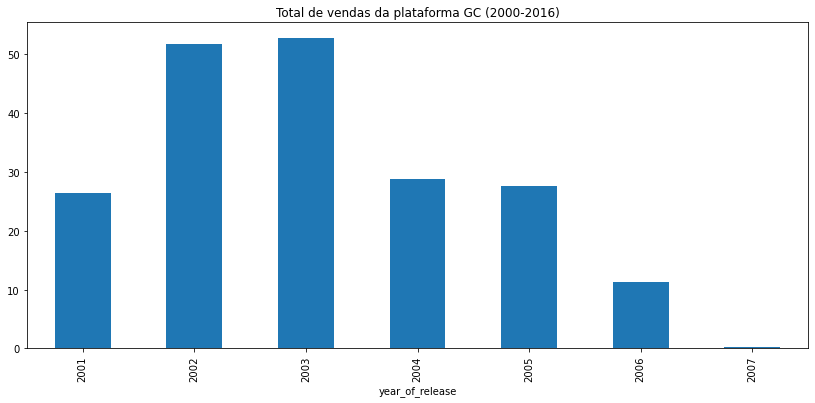

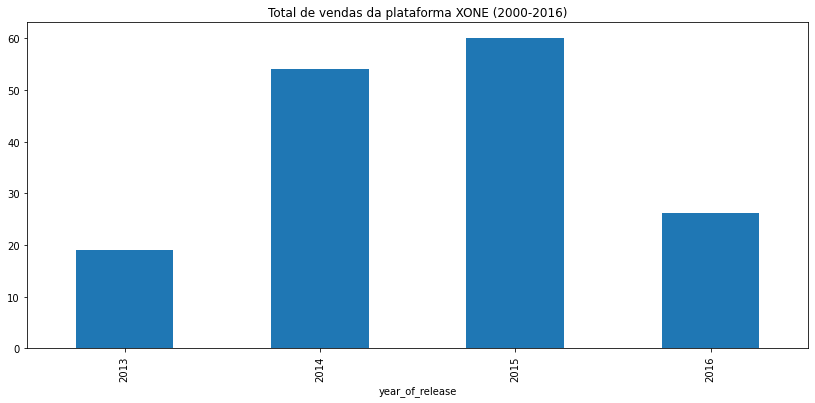

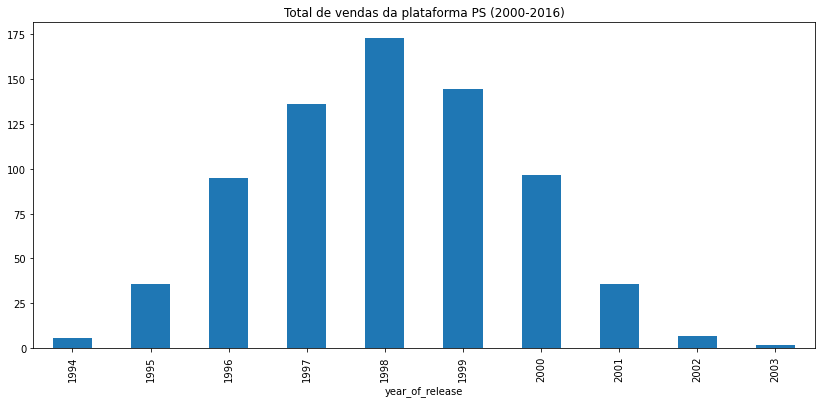

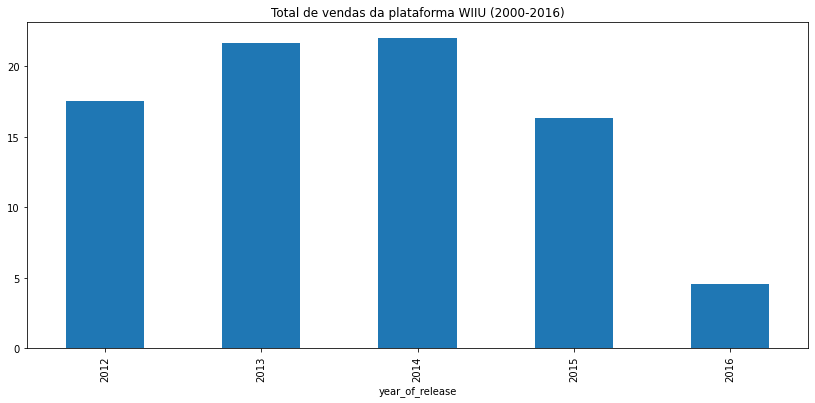

In [37]:
# Criando uma fatia de "game_filt_sales" com apenas as 10 primeiras plataformas
game_sales_head = game_filt_sales.head(15)

# Criando um loop "for" para criar os gráficos
for platform in game_sales_head.index:
    data = game_data.query('platform == @platform')
    data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(14,6))
    plt.title(f'Total de vendas da plataforma {platform.upper()} (2000-2016)')
    plt.show()

É importante considerar que os dados para o ano de 2016 podem estar incompletos. Mas considerando a atualidade, as plataformas PS2, DS, GBA, PSB, XB, GC e PS já não têm atividade; X360, PS3, Wii, 3DS, PC e Wiiu estão em declínio; ao passo que PS4 e Xone são as únicas plataformas das top 15 de 2000-2016 ainda em ascensão. Provavelmente os anos seguintes trarão ainda mais vendas antes que o declínio dessas plataformas se inicie.

### Lucratividade atual das plataformas

Vamos observar a lucratividade das plataformas na atualidade, para tentar prever as que ainda terão vendas significativas em 2017. Assim, precisamos selecionar as plataformas que ainda têm atividade significativa em 2016: PS4, 3DS, PC, Xone e Wiiu. Vamos criar diagramas de caixa para observar as vendas dessas plataformas mundialmente:

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

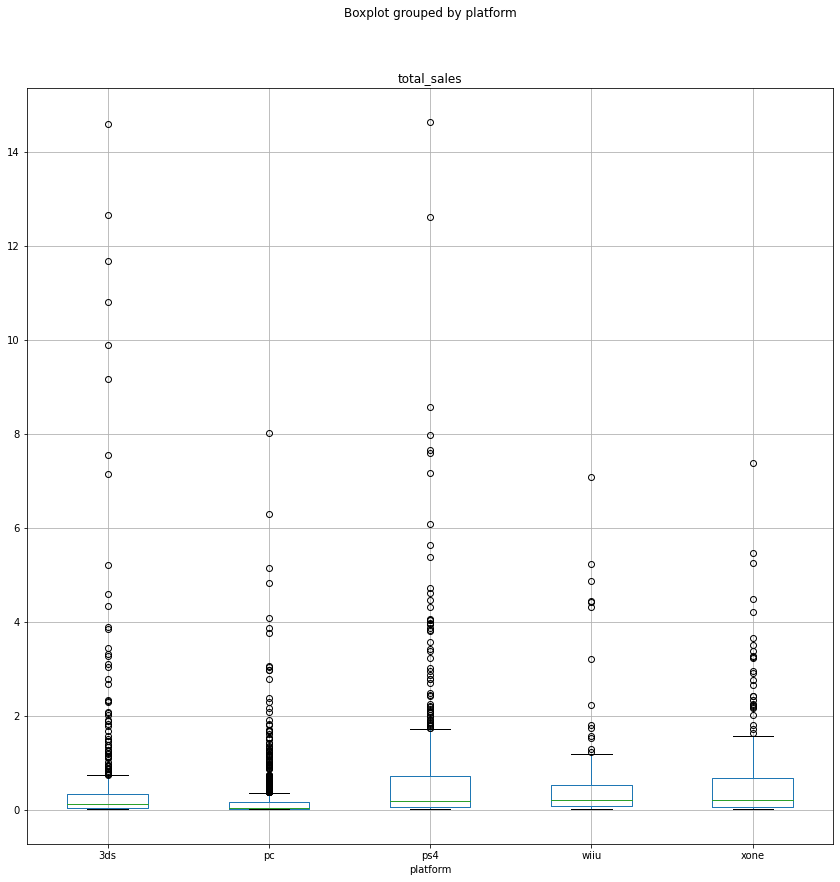

In [38]:
game_filt.query('platform == "ps4" | platform == "3ds" | platform == "pc" | platform == "xone" | platform == "wiiu"').boxplot(column='total_sales', by='platform', figsize=(14,14))

Temos medianas muito parecidas entre 3DS, PS4, Wiiu e Xone. Já PC tem uma mediana mais próxima de 0. PS4 e 3DS são as plataformas com a maior quantidade de pontos além do limite superior, o que dá certo destaque a essas plataformas em relações as outras.

### Os efeitos das avaliações nas vendas

Avaliações indicam as opiniões dos críticos profissionais e do público em geral em relação aos jogos. É possível que essas avaliações impactem (ou sejam resultado) do sucesso das plataformas. A plataforma 3DS, ainda em atividade, mas lançada desde 2011, pode nos trazer alguns insights interessantes sobre isso. Vamos ver como as vendas dos jogos se saem em relação as críticas profissionais e as críticas feitas por usuários:

Text(0.5, 1.0, 'Relação entre avaliação da crítica e vendas de jogos do 3DS')

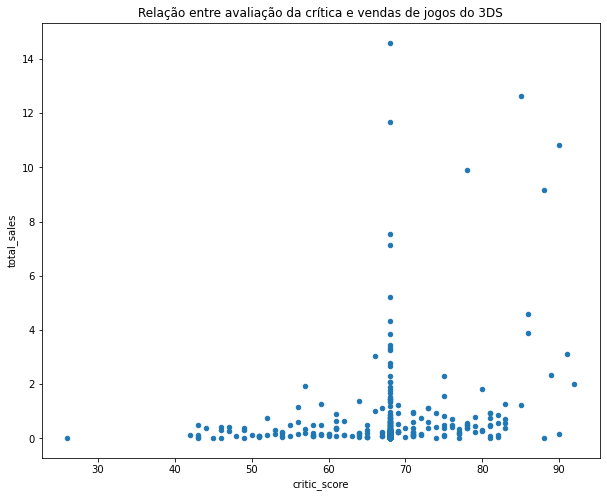

In [39]:
# Criando uma fatia do DataFrame com os dados apenas da plataforma 3DS
ratings_3ds = game_filt.loc[(game_filt['platform'] == '3ds')]

# Gerando gráficos de dispersão para a relação das críticas profissionais com as vendas dos jogos
ratings_3ds.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(10,8))
plt.title('Relação entre avaliação da crítica e vendas de jogos do 3DS')

Observando é possível notar uma certa correlação positiva entre as avaliações positivas da crítica e o desempenho dos jogos para o 3DS. Vamos conferir o coeficiente de correlação para entender melhor essa relação:

In [40]:
ratings_3ds['total_sales'].corr(ratings_3ds['critic_score'])

0.22785374168278597

O coeficiente não parece indicar uma correlação entre a avaliação dos críticos e as vendas. Vamos analisar a relação das vendas com a avaliação dos usuários agora:

Text(0.5, 1.0, 'Relação entre avaliação dos usuários e vendas de jogos do 3DS')

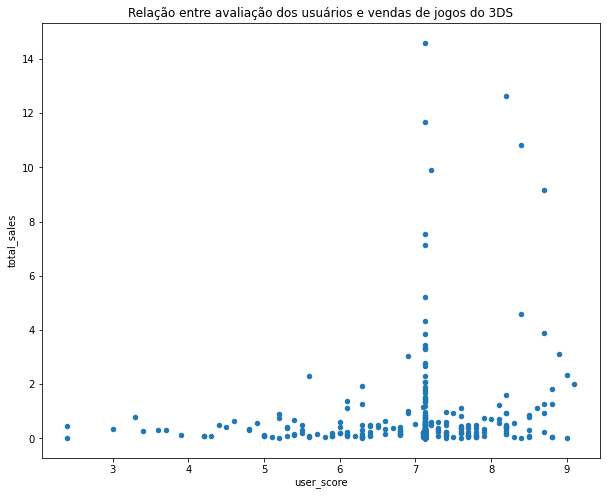

In [41]:
# Criando o gráfico para as avaliações de usuários
ratings_3ds.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,8))
plt.title('Relação entre avaliação dos usuários e vendas de jogos do 3DS')

Parece haver correlação positiva ainda mais leve entre a avaliação dos usuários e as vendas. Vamos ver se o coeficiente de correlação pode confirmar isso:

In [42]:
ratings_3ds['total_sales'].corr(ratings_3ds['user_score'])

0.13025025741691698

O coeficiente de correlação também não indica uma relação as avaliações dos usuários e as vendas: o valor é tão baixo que é impossível afirmar se há de fato alguma relação. É importante ressaltar que o coeficiente de correlação é capaz de apontar apenas uma relação linear entre as variáveis, ou seja, outras formas de correlação podem existir, mas passar despercebidas pela coeficiente.

Pelo menos para os jogos lançados em 3DS, não parece haver relação significativa entre avaliações, seja de críticos ou de usuários, e o total de venda dos jogos. Porém, vamos executar esse procedimento para outra plataforma, o PS3.

Text(0.5, 1.0, 'Relação entre avaliação dos usuários e vendas de jogos do PS3')

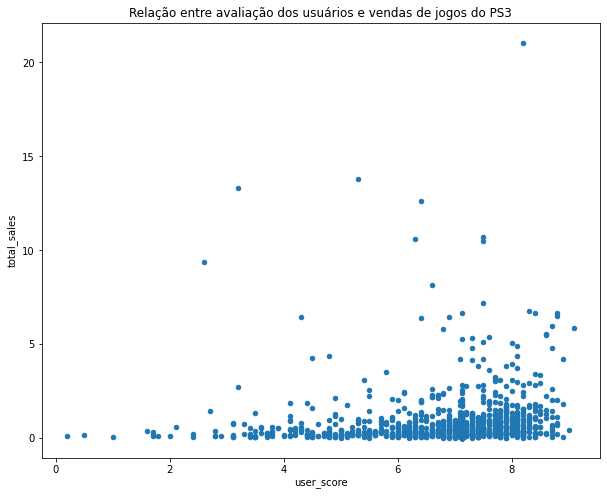

In [43]:
# Criando uma fatia do DataFrame com os dados apenas da plataforma PS3
ratings_ps3 = game_filt.loc[(game_filt['platform'] == 'ps3')]

# Gerando gráficos de dispersão para a relação das avaliações de usuários com as vendas dos jogos
ratings_ps3.plot(x='user_score', y='total_sales', kind='scatter', figsize=(10,8))
plt.title('Relação entre avaliação dos usuários e vendas de jogos do PS3')

In [44]:
# Estimando o coeficiente de correlação
ratings_ps3['total_sales'].corr(ratings_ps3['user_score'])

0.07909374515704992

Observando o gráfico e o coeficiente de correlação, parece não ser possível afirmar que há qualquer correlação lienar e

### O lucro por gênero

Vamos analisar os gêneros em relação ao lucro e tentar estabelecer quais foram os gêneros mais lucrativos no período que selecionamos. De início, vamos organizar os gêneros por total de vendas:

In [45]:
game_filt.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
action          1549.41
sports          1150.19
shooter          920.28
role-playing     734.37
misc             730.57
racing           565.35
platform         495.61
simulation       337.42
fighting         316.30
adventure        186.50
puzzle           139.86
strategy         116.73
Name: total_sales, dtype: float64

Os gêneros mais lucrativos no périodo foram "action", "sports", "shooter", "role-playing" e "misc". Do outro lado, "platform", "fighting", "adventure", "puzzle" e "strategy" são os gêneros com menores vendas. Vamos criar um gráfico de barras para ter outra visão dos dados:

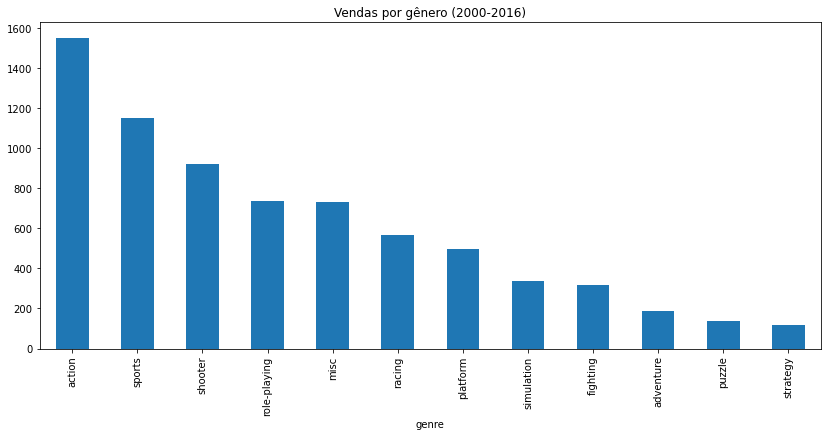

In [46]:
game_filt.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))

# Dando um título ao gráfico
plt.title('Vendas por gênero (2000-2016)')

# Mostrando o gráfico
plt.show()

"Action", o gênero com maior número de vendas, possui cerca do dobro das vendas do quarto e quinto gêneros mais vendidos, "role-playing" e "misc". Vamos ver gráficos para a quantidade jogos lançados por plataforma.

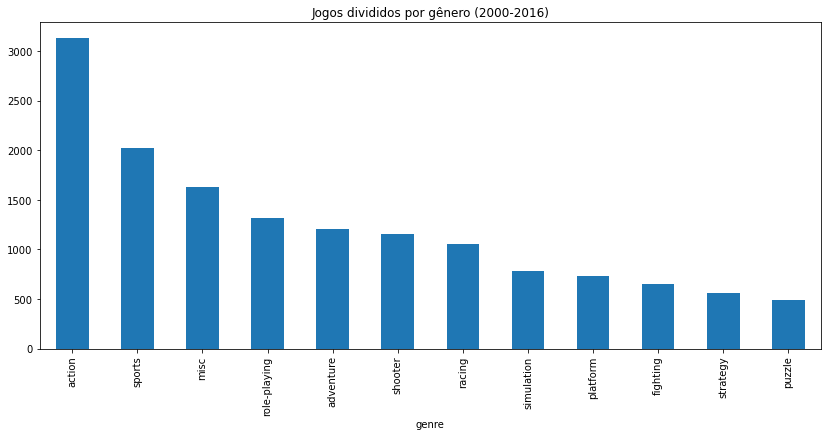

In [47]:
# Criando o gráfico de quantidade de jogos por gênero
game_filt.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))

# Nomeando o gráfico
plt.title('Jogos divididos por gênero (2000-2016)')

# Mostrando o gráfico
plt.show()

Fica aparente que a quantidade de jogos lançados tem uma relação direta com a lucratividade de cada gênero. Com excessão de "adventure", os gêneros mais vendidos são também os gêneros com mais lançamentos. Assim, há fortes evidências que essas duas características tem uma forte correlação entre si, sendo um bom reflexo da popularidade dos gêneros. O mesmo se pode dizer sobre os gêneros com baixa lucratividade, também relacionados com os gêneros com menos lançamentos.

## Os perfis dos usuários de cada região

Agora, vamos estabelecer perfis para os usuários das regiões AN, UE e JP, e observar as características particulares de cada um.

### As plataformas favoritas por região

Vamos criar gráficos de pizza com as 5 plataformas com maiores vendas em cada região:

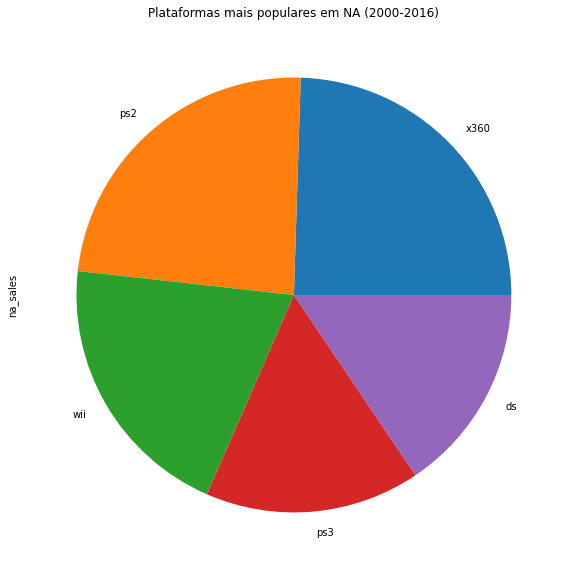

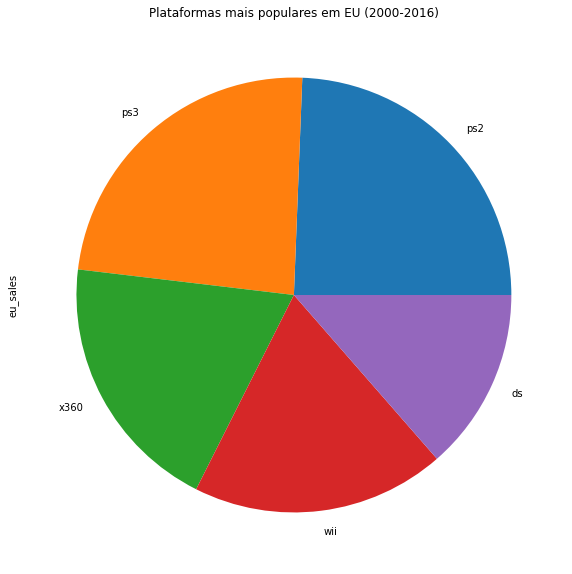

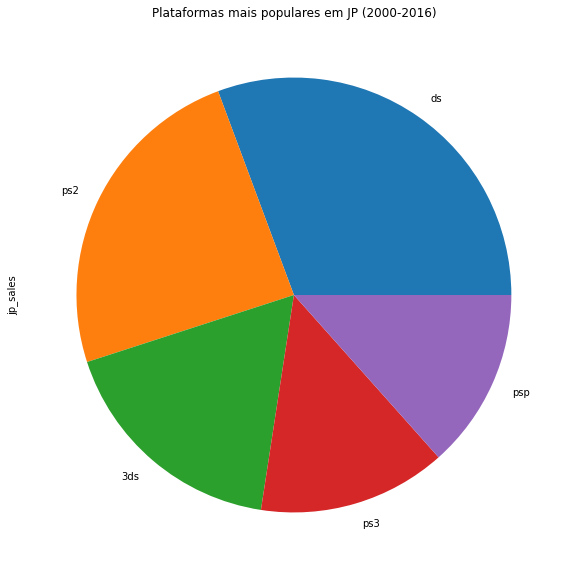

In [48]:
# Criando o gráfico para a América do Norte
game_filt.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Plataformas mais populares em NA (2000-2016)')

# Exibindo o gráfico
plt.show()

# Criando o gráfico para a América do Norte
game_filt.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Plataformas mais populares em EU (2000-2016)')

# Exibindo o gráfico
plt.show()

# Criando o gráfico para a América do Norte
game_filt.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Plataformas mais populares em JP (2000-2016)')

# Exibindo o gráfico
plt.show()

Vemos que há certas similaridades entre as plataformas preferidas pelos consumidores da América do Norte e da Europa: apesar de haver certa mudança na posição de popularidades das plataformas, as 5 mais lucrativas são as mesmas, X360, PS2, PS3, Wii e DS. Uma das diferenças se dá na popularidade do PS3, que está em segundo lugar na Europa, com uma boa fatia de vendas, e em quarto na América, com uma fatia comparativamente menor. Nos dois casos, o DS ocupa a quinta posição, com proporção de vendas semelhantes.

Já para os consumidores do Japão, as 5 plataformas mais populares são DS, PS2, 3DS, PS3 e PSP, nessa ordem. PS2, PS3 e DS são similares a NA e EU, mas as outras plataformas são diferentes. Temos aqui a DS como a plataforma com maiores vendas e uma fatia de mercado ainda maior que as que ocupavam o primeiro lugar para as outras regiões. Já o PSP e o PS3 tem fatias de vendas menores e bem próximas em proporção.

### Os gêneros favoritos de cada região

Vamos agora observar as preferências de cada região em relação aos gêneros.

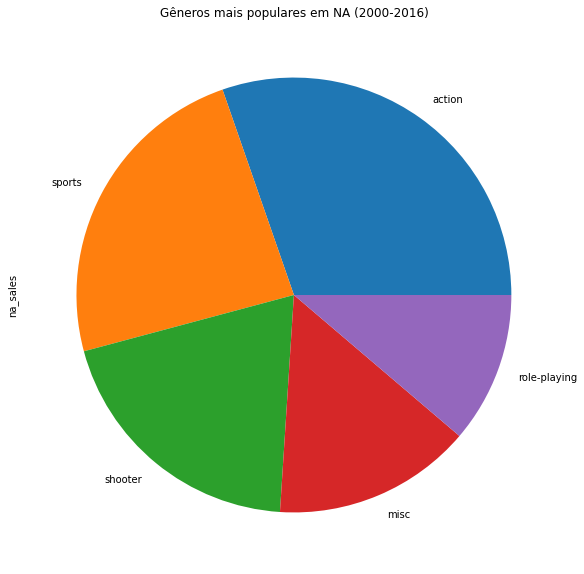

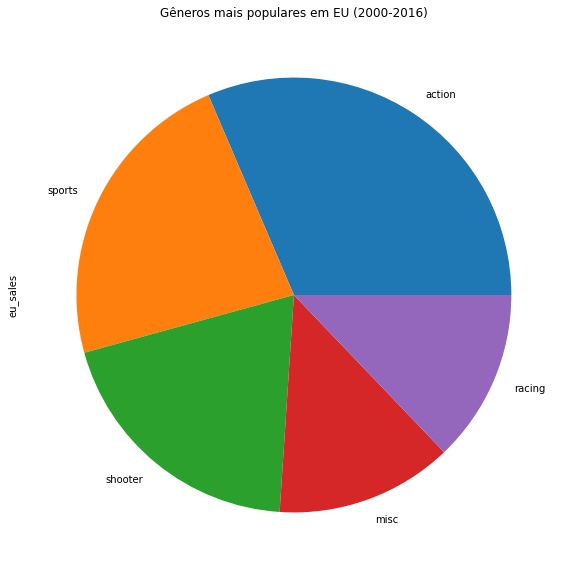

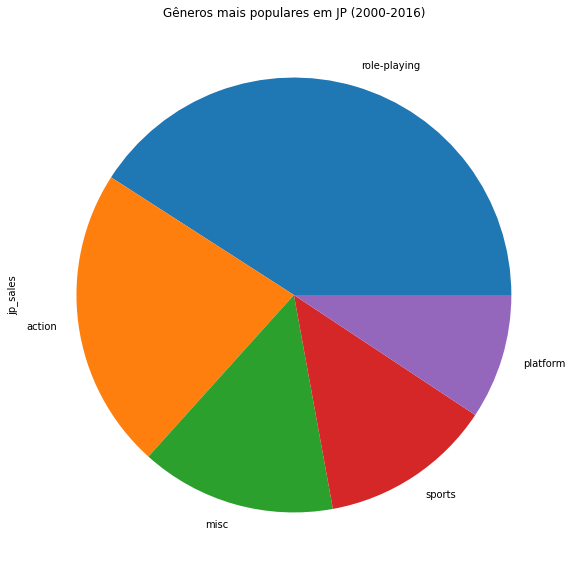

In [49]:
# Criando o gráfico para a América do Norte
game_filt.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Gêneros mais populares em NA (2000-2016)')

# Exibindo o gráfico
plt.show()

# Criando o gráfico para a América do Norte
game_filt.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Gêneros mais populares em EU (2000-2016)')

# Exibindo o gráfico
plt.show()

# Criando o gráfico para a América do Norte
game_filt.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Gêneros mais populares em JP (2000-2016)')

# Exibindo o gráfico
plt.show()

Novamente, os usuários da América do Norte tem preferências similares aos da Europa. O único gênero diferente entre os 5 mais lucrativos das duas regiões é "role-playing", que é substituído por "racing" na EU. Quanto as fatias, são também bem similares, com "action", "sports" e "shooter" tendo proporções bastante próximas.

No Japão, porém, o gênero com mais vendas, "role-playing", possui uma grande fatia do mercado, em comparação ao primeiro lugar das outras regiões. "Action", mais vendido na América e na Europa, aqui ocupa o segundo lugar, com uma quota similar ao segundo lugar dessas duas regiões. Os últimos 3 gêneros do "top 5" japonês, "misc", "sports" e "platform", têm fatias bem inferiores em comparação aos seus correspondentes nas outras regiões. Isso mostra o mercado do Japão como bem mais concentrado no tocante ao gênenro mais vendido.

### A classificação para cada região

Vamos ver como a classificação ESRB afeta as vendas nas três regiões.

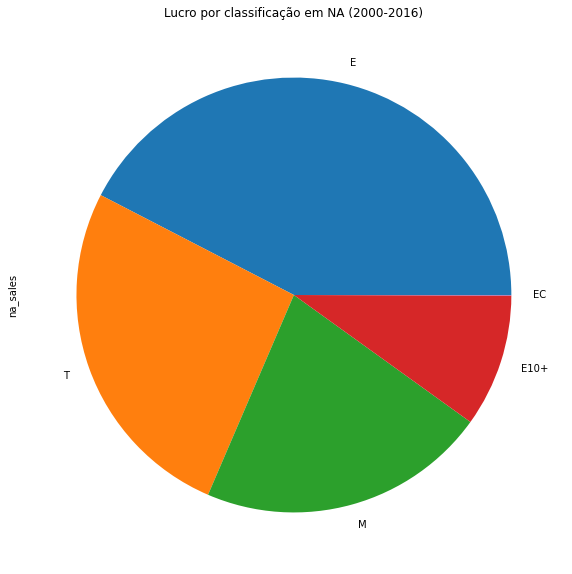

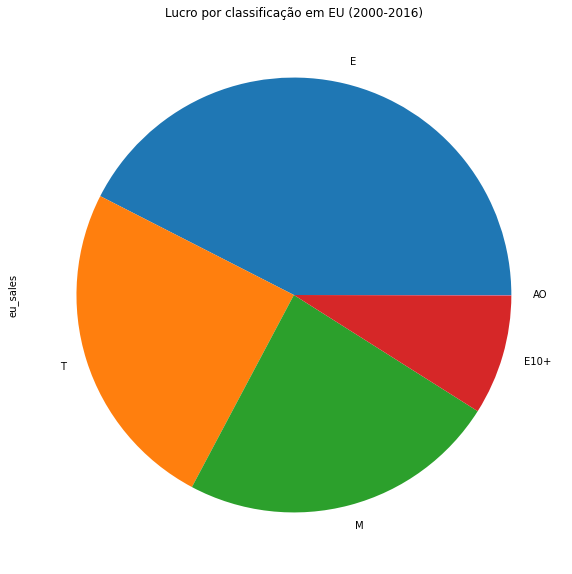

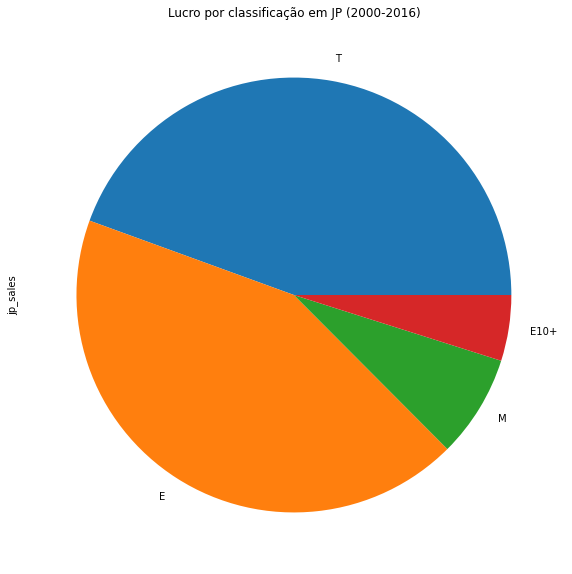

In [50]:
# Criando o gráfico para a América do Norte
game_filt.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Lucro por classificação em NA (2000-2016)')

# Exibindo o gráfico
plt.show()

# Criando o gráfico para a América do Norte
game_filt.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Lucro por classificação em EU (2000-2016)')

# Exibindo o gráfico
plt.show()

# Criando o gráfico para a América do Norte
game_filt.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head().plot(kind='pie', figsize=(16,10))

# Nomenado o gráfico
plt.title('Lucro por classificação em JP (2000-2016)')

# Exibindo o gráfico
plt.show()

Como nos outros aspectos, América do Norte e Europa são bem similares na classificação. Temos que "E", "T", "M" e "E10+" ocupam os primeiros 4 lugares para as duas regiões, na mesma ordem e com quotas similares. O quinto lugar, com fatias mínimas, fica com "EC" no caso da NA e "AO" na EU.

Novamente, o Japão possui um perfil bem diferente, com as classificações com mais vendas sendo, em ordem, "T", "E", "M" e "E10+". Quase todo o mercado fica dividido entre as duas primeiras, com pequenas quotas para as duas últimas. Novamente, o mercado japonês parece mais concentrado na questão da classificação.

**Conclusão**

O perfil dos consumidores da América do Norte é muito similar ao da Europa: ambos tem preferências pelas mesmas plataformas ( X360, PS2, PS3, Wii e DS), com leves diferenças, consomem gêneros muito parecidos ("action", "sports" e "shooter" e "misc") e em proporções próximas, e tem as mesmas classificações entre as mais lucrativas ("E", "T", "M" e "E10+", nessa ordem). No geral, as preferências desses usuários são mais equilibradas, sem um gênero ou classificação dominante.

Já o perfil do usuário japonês é bem diferente, preferindo outros tipos de plataformas, como DS, PS2, 3DS, PS3 e PSP, e outros gêneros, "role-playing", "action", "misc", "sports" e "platform". As classificações mais lucrativas também são bem particulares, ordenadas da seguinte maneira: "T", "E", "M" e "E10+". Também há uma dominação maior do mercado por parte dos gêneros "role-playing" e "action", e das classificações "T" e "E".

## Testes de hipóteses

Algumas hipóteses precisam ser testadas, são elas:
* As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
* As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Vamos realizar dois testes para saber se essas hipóteses são válidas ou não.

### Testando se as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

Primeiro, precisamos estabelecer nossa hipótese nula, ou seja, a hipótese que desejamos estabelecer se os dados são suficientes para rejeitar. Sendo assim, nossa hipótese nula será: "A classificação média dos usuários das plataformas Xbox One e PC são as mesmas." Já a hipótese alternativa, que é o contrário da nula, será: "A classificação média dos usuários das plataformas Xbox One e PC são diferentes." Com essas hipóteses executaremos um teste bicaudal, e o resultado, o valor P, indica a propabilidade de obter esses dados se a hipótese nula for verdadeira. Assim, se o valor P for menor que o valor que decidimos para "alfa" (o nível de significância mínimo) teremos razões suficientes para rejeitar nossa hipótese nula (que as classificações médias são iguais). Caso contrário, não podemos rejeitá-la. Para este teste, escolhemos o valor de 5% para alfa.

Vamos começar criando duas fatias dos dados: uma com os dados da plataforma Xbox One ("xone") e outra para PC.

In [51]:
# Dados do Xbox One
xone_data = game_filt.loc[(game_filt['platform'] == 'xone')]

# Resetando o índice da tabela
xone_data.reset_index(drop=True, inplace=True)

# Exibindo as primeiras linhas
xone_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,xone,2015,shooter,4.59,2.11,0.01,0.68,68,7.125046,M,7.39
1,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97,7.900000,M,5.47
2,call of duty: advanced warfare,xone,2014,shooter,3.22,1.55,0.01,0.48,81,5.400000,M,5.26
3,halo 5: guardians,xone,2015,shooter,2.78,1.27,0.03,0.41,84,6.400000,T,4.49
4,fallout 4,xone,2015,role-playing,2.51,1.32,0.01,0.38,88,6.200000,M,4.22


In [52]:
# Dados do PC
pc_data = game_filt.loc[(game_filt['platform'] == 'pc')]

# Resetando o índice da tabela
pc_data.reset_index(drop=True, inplace=True)

# Exibindo as primeiras linhas
pc_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,the sims 3,pc,2009,simulation,0.99,6.42,0.0,0.60,86,7.6,T,8.01
1,world of warcraft,pc,2004,role-playing,0.08,6.21,0.0,0.00,93,7.3,T,6.29
2,diablo iii,pc,2012,role-playing,2.44,2.16,0.0,0.54,88,4.0,M,5.14
3,starcraft ii: wings of liberty,pc,2010,strategy,2.57,1.68,0.0,0.58,93,8.2,T,4.83
4,world of warcraft: the burning crusade,pc,2007,role-playing,2.57,1.52,0.0,0.00,91,7.9,T,4.09


Vamos averiguar se as variâncias das duas amostras são similares. Isso é importante para quando calcularmos o valor P.

In [53]:
# Variância das classificações do Xbox One
np.var(xone_data['user_score'])

1.468085320136976

In [54]:
# Variância das classificações do PC
np.var(pc_data['user_score'])

1.8477455342766311

Podemos comparar as variâncias com uma regra básica: se a razâo da variância maior para a variância menor for maior que 4, consideramos as variâncias diferentes.

In [55]:
np.var(pc_data['user_score'])/np.var(xone_data['user_score'])

1.258609093716864

Como a razão é 1,26, portanto menor que 4, vamos executar um teste T considerando que a variância das duas amostras são iguais. Essa informação será passada ao método "st.ttest_ind()" que utilizaremos a seguir para o teste de hipóteses.

In [56]:
# Definindo nosso valor de alfa para 5%
alpha = 0.05

# Executando o teste
result = st.ttest_ind(pc_data['user_score'], xone_data['user_score'], equal_var=True)

# Exibindo p valor P
print('P-value:', result.pvalue)

# Estrutura condicional para rejeitar ou não a hipótese nula
if result.pvalue < alpha:
    print('Nós rejeitamos a hipótese da média das classificações serem iguais')
else:
    print('Nós não rejeitamos a hipótese da médias das classificações serem iguais')

P-value: 0.00011040729679183205
Nós rejeitamos a hipótese da média das classificações serem iguais


Como nosso valor P é menor que nosso valor alfa, nós podemos rejeitar a hipóteses da média das classificações dos usuários de Xbox One e PC serem as mesmas. Isso implica que muito provavelmente as classificações dos usuários das duas plataformas são diferentes.

### Testando se as classificações médias dos usuários dos gêneros "action" e "sports" são diferentes

Agora, vamos testar se é possível afirmar que as classificações dos usuários dos gêneros "action" (ação) e "sports" (esportes) podem ser consideradas iguais. Precisamos estabelecer nossa hipótese nula, que neste caso será: "A média das classificações dos usuários dos gêneros 'action' e 'sports' são iguais". Assim, a hipótese alternativa é: "A média das classificações dos usuários dos gêneros 'action' e 'sports' são diferentes." Com essas hipóteses, vamos realizar um teste T bicaudal para decidir se podemos rejeitar ou não a hipótese nula.

Como fizemos no teste anterior, vamos criar fatias com os dados de cada um dos gêneros:

In [57]:
# Criando a tabela com os dados do gênero "action"
action_data = game_filt.loc[(game_filt['genre'] == 'action')]

# Resetando o índice da tabela
action_data.reset_index(drop=True, inplace=True)

# Exibindo as primeiras linhas
action_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto: san andreas,ps2,2004,action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
2,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
3,grand theft auto: vice city,ps2,2002,action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
4,grand theft auto iii,ps2,2001,action,6.99,4.51,0.30,1.30,97,8.5,M,13.10


In [58]:
# Criando a tabela com os dados do gênero "sports"
sports_data = game_filt.loc[(game_filt['genre'] == 'sports')]

# Resetando o índice da tabela
sports_data.reset_index(drop=True, inplace=True)

# Exibindo as primeiras linhas
sports_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
2,wii fit,wii,2007,sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
3,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
4,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


Vamos estimar as variâncias de cada tabela e descobrir a razão entre elas:

In [59]:
# Calculando a variância das classificações para o gênero "action"
np.var(action_data['user_score'])

1.1753037253348573

In [60]:
# Calculando a variância das classificações para o gênero "sports"
np.var(sports_data['user_score'])

1.4215821384230098

In [61]:
# Calculando a razão entre as variâncias
np.var(sports_data['user_score'])/np.var(action_data['user_score'])

1.209544484356999

Como a razão entre as variâncias é menor que 4, podemos considerá-las iguais. Vamos agora executar o teste T:

In [62]:
# Definindo nosso valor de alfa para 5%
alpha = 0.05

# Executando o teste
result = st.ttest_ind(action_data['user_score'], sports_data['user_score'], equal_var=True)

# Exibindo p valor P
print('P-value:', result.pvalue)

# Estrutura condicional para rejeitar ou não a hipótese nula
if result.pvalue < alpha:
    print('Nós rejeitamos a hipótese da média das classificações serem iguais')
else:
    print('Nós não rejeitamos a hipótese da médias das classificações serem iguais')

P-value: 0.18822204769779177
Nós não rejeitamos a hipótese da médias das classificações serem iguais


O resultado é que não podemos rejeitar a hipótese de que as médias das classificações dos gêneros "action" e "sports" são iguais, uma vez que nosso valor P é maior que nosso valor alfa.

## Conclusão

Iniciamos este projeto com uma fase de pré-processamento dos dados. Nessa estapa nós corrigimos os formatos de algumas colunas, alteramos alguns nomes de colunas e categorias para letras minúsculas para facilitar a análise, e averiguamos a presença de valores ausentes. Tratamos as ausências caso a caso, substituindo-as pela média ou mediana condicionada a aspectos relacionados a cada uma. Também somamos os valores das vendas nas três regiões, América do Norte, Europa e Japão, com as vendas no resto do mundo, para obter as vendas totais para cada jogo.

Na fase de análise dos dados, nós podemos como a frequência de lançamentos de jogos se intensificou a partir dos anos 2000. Vimos também como acontece o ciclo de vida das plataformas, durante um período de cerca de 10 anos, onde os primeiros 5 anos normalmente são de aumento de popularidade e os últimos 5 anos são de declínio. Com essas informações, decidimos selecionar os dados de 2000 a 2016 para nossa análise, de modo a englobar todo o período de atividade das plataformas ativas nos últimos anos. Estudamos a lucratividade das plataformas, e observamos que PS4 e Xbox One são as únicas que estão em ascensão no momento, apesar de outras plataformas, como X360 e PS3, ainda terem um volume considerável de vendas. Concluímos que no quesito vendas globais, PS4 e 3DS são as plataformas com maior destaque em lucratividade, enquanto PC é a com mais baixa mediana entre as mais populares.

Também observamos que as classificações dos usuários e dos críticos não têm impacto aparente sobre as vendas dos jogos. 